In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df_wines = pd.read_csv('wine-quality/wine_quality_combined.csv')
df_red=pd.read_csv('wine-quality/wine_quality_red.csv')
df_white=pd.read_csv('wine-quality/wine_quality_white.csv')

In [15]:
df_shuffled = df_wines.sample(frac=1).reset_index(drop=True)
shuffled_features = df_shuffled.iloc[:,:-3]
shuffled_class_labels = np.array(df_shuffled['quality_label'])
shuffled_label_names = ['low','medium','high']
shuffled_features_names = list(shuffled_features.columns)
shuffled_train_X,shuffled_test_X,shuffled_train_y,shuffled_test_y = train_test_split(shuffled_features,shuffled_class_labels, test_size=0.999, random_state=42)

In [16]:
wqp_features = df_shuffled.iloc[:,:-3]
wqp_class_labels = np.array(df_shuffled['quality_label'])
wqp_label_names = ['low','medium','high']
wqp_features_names = list(wqp_features.columns)
wqp_train_X,wqp_test_x,wqp_train_y,wqp_test_y=train_test_split(wqp_features,wqp_class_labels, test_size=0.3, random_state=42)

In [17]:
wqp_ss = StandardScaler().fit(wqp_train_X)
wqp_train_SX = wqp_ss.transform(wqp_train_X)
wqp_test_SX=wqp_ss.transform(wqp_test_x)

In [18]:
print(shuffled_features_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

wqp_dt=DecisionTreeClassifier().fit(wqp_train_SX,wqp_train_y)
dt_predictions = wqp_dt.predict(wqp_test_SX)
print(classification_report(wqp_test_y,dt_predictions,target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       0.31      0.42      0.36        52
      medium       0.67      0.72      0.69       689
        high       0.81      0.77      0.79      1209

    accuracy                           0.74      1950
   macro avg       0.60      0.64      0.61      1950
weighted avg       0.75      0.74      0.75      1950



In [20]:
df_wines['quality_label'].value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

In [23]:
dt_predictions = wqp_dt.predict(shuffled_test_X)
print(classification_report(shuffled_test_y,dt_predictions,target_names=shuffled_label_names))

              precision    recall  f1-score   support

         low       0.03      1.00      0.06       198
      medium       0.00      0.00      0.00      2381
        high       0.00      0.00      0.00      3912

    accuracy                           0.03      6491
   macro avg       0.01      0.33      0.02      6491
weighted avg       0.00      0.03      0.00      6491

/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-4/class/decisiontree/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-4/class/decisiontree/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

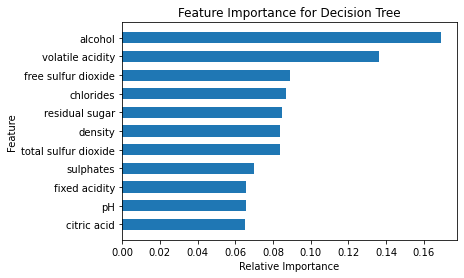

In [25]:
wqp_dt_feature_importances=wqp_dt.feature_importances_
wqp_dt_feature_names,wqp_dt_feature_scores = zip(*sorted(zip(wqp_features_names,wqp_dt_feature_importances), key=lambda x:x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position,wqp_dt_feature_scores,height=0.6,align='center')
plt.yticks(y_position,wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t=plt.title('Feature Importance for Decision Tree')

In [46]:
from graphviz import Source
from sklearn import tree
from IPython.display import Image

graph = Source(tree.export_graphviz(wqp_dt,out_file=None,class_names=wqp_label_names,filled=True, rounded=True, special_characters=False,feature_names=wqp_features_names, max_depth=3))
# Image(graph)
# display(graph)

In [50]:
graph.render(filename='data', format = 'png')

'data.png'

In [51]:
from sklearn.ensemble import RandomForestClassifier
wqp_rfc = RandomForestClassifier().fit(wqp_train_SX,wqp_train_y)
wqp_rfc_predictions = wqp_rfc.predict(wqp_test_SX)
print(classification_report(wqp_test_y,wqp_rfc_predictions,target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       0.86      0.35      0.49        52
      medium       0.78      0.77      0.78       689
        high       0.85      0.88      0.86      1209

    accuracy                           0.82      1950
   macro avg       0.83      0.66      0.71      1950
weighted avg       0.82      0.82      0.82      1950



In [52]:
wqp_rfc_predictions = wqp_rfc.predict(shuffled_test_X)
print(classification_report(shuffled_test_y,wqp_rfc_predictions,target_names=shuffled_label_names))

              precision    recall  f1-score   support

         low       0.00      0.00      0.00       198
      medium       0.40      0.53      0.45      2381
        high       0.63      0.53      0.57      3912

    accuracy                           0.51      6491
   macro avg       0.34      0.35      0.34      6491
weighted avg       0.52      0.51      0.51      6491

/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-4/class/decisiontree/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alonp/Documents/CABerlin/module-1/assignment-01/sprint-4/class/decisiontree/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

In [55]:
import time

start_time = time.time()
importances = wqp_rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in wqp_rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.025 seconds


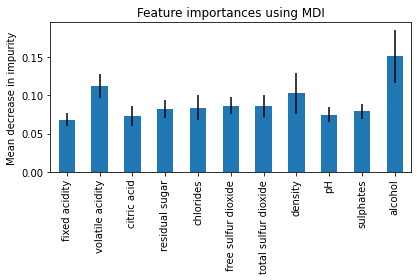

In [57]:
forest_importances = pd.Series(importances, index=wqp_features_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [59]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    wqp_rfc, wqp_test_SX, wqp_test_y, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=wqp_features_names)

Elapsed time to compute the importances: 3.648 seconds


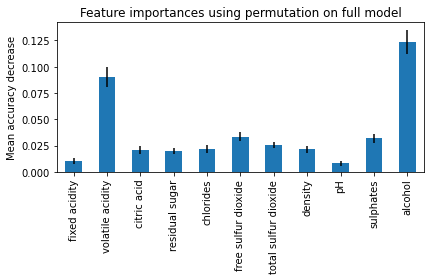

In [60]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()